In [1]:
from IPython.display import display, HTML
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import altair as alt
#alt.renderers.enable("notebook")
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.datasets import make_blobs
from sklearn.linear_model import  LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split,KFold, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold, GridSearchCV
from sklearn import feature_selection as fs
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
#from keras.models import Sequential,model_from_json
#from keras.layers import Dense
#from keras.optimizers import RMSprop
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import RandomizedLasso,LassoLarsCV
from sklearn.exceptions import ConvergenceWarning 
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
import sklearn.datasets 

%matplotlib inline

from scipy.stats import skew
from sklearn import preprocessing
import time
import pickle


from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error, median_absolute_error
import sklearn.metrics
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor


In [2]:
#Load data
abalone=pd.read_csv("abalone.csv")

In [3]:
#view data
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
#statistical description of the data
abalone.describe()



,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


in the statisticall Described Information we can notice:

All Features are not Normally Distributed, Mean = Median = Mode.
All features are numerical except Sex
Different Scale, so need to standarize

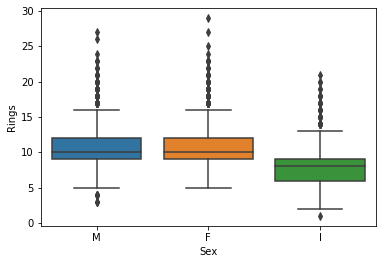

In [6]:
import matplotlib.pyplot as plt
ax = sns.boxplot(x="Sex", y="Rings", data=abalone)
plt.show()

In [7]:
df=abalone

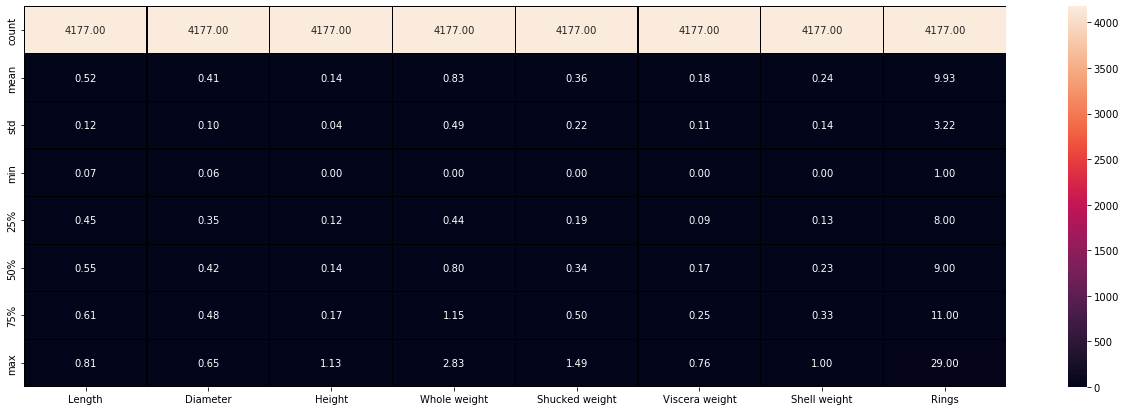

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [9]:
abalone.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


'According to the Infomation:\n1)No-Null data\n2)1 - Object Type\n3)7 - Float Type\n4)1 - Int Type'

In [10]:
#type of data we have in each column
abalone.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [11]:
abalone.shape

(4177, 9)

In [12]:
'''Missing Values '''
miss_df = abalone.isnull().sum().sort_values(ascending = False)
miss_df

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [13]:
df=abalone

In [14]:
'''Numerical Features and Categorical Features'''
nf = df.select_dtypes(include=[np.number]).columns
cf = df.select_dtypes(include=[np.object]).columns

In [15]:
nf


Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [16]:
cf

Index(['Sex'], dtype='object')

Sex is the only no numerical column. Sex is categorical column. The, rest, are all numerical.

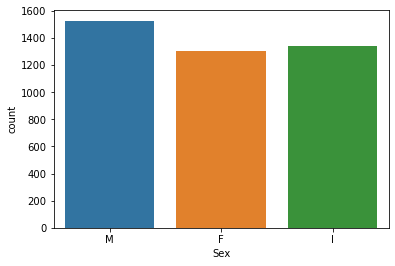

In [17]:
#visualization of type of sex
'''Sex Count of Abalone, M - Male, F - Female, I - Infant'''
sns.countplot(x='Sex', data = df)

In [18]:
#Sex counta and percentage  in Abalone
print("\nSex Count in Percentage")
print(df.Sex.value_counts(normalize = True))
print("\nSex Count in Numbers")
print(df.Sex.value_counts())


Sex Count in Percentage
M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64

Sex Count in Numbers
M    1528
I    1342
F    1307
Name: Sex, dtype: int64


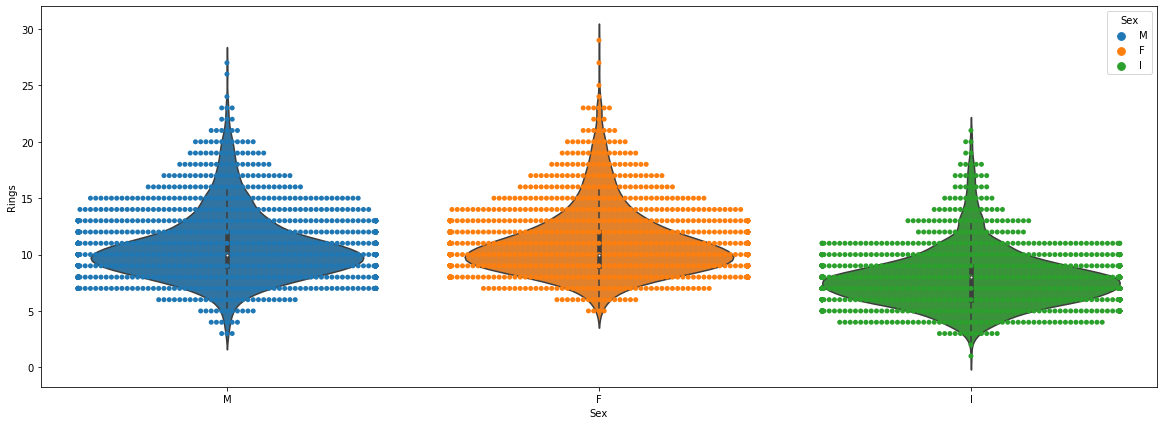

In [19]:
#Sex and Rings data Visulization
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'Rings', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Rings', data = df)

Preprocessing
For the categorical data ‘Sex’ we will do One-Hot-Encoding for 

‘M’(Male)

‘F’(Female)

‘I’(Infant)

In [20]:
df["M"] = np.nan
df["F"] = np.nan
df["I"] = np.nan
columnName='Sex'
for i in range (len(df[columnName])):
    if df[columnName][i]=='M':
      df['M'][i]=1
      df['F'][i]=0
      df['I'][i]=0
    elif df[columnName][i]=='F':
      df['M'][i]=0
      df['F'][i]=1
      df['I'][i]=0
    elif df[columnName][i]=='I' :
      df['M'][i]=0
      df['F'][i]=0
      df['I'][i]=1
df=df.drop(['Sex'],axis=1)

In [21]:
'''Target Column Analysis'''
print("Value Count of Rings Column")
print(df.Rings.value_counts())
print("\nPercentage of Rings Column")
print(df.Rings.value_counts(normalize = True))

Value Count of Rings Column
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

Percentage of Rings Column
9     0.164951
10    0.151784
8     0.135983
11    0.116591
7     0.093608
12    0.063921
6     0.062006
13    0.048599
14    0.030165
5     0.027532
15    0.024659
16    0.016040
17    0.013886
4     0.013646
18    0.010055
19    0.007661
20    0.006225
3     0.003591
21    0.003352
23    0.002155
22    0.001436
27    0.000479
24    0.000479
1     0.000239
26    0.000239
29    0.000239
2     0.000239
25    0.000239
Name: Rings, dtype: float64


In [22]:
print(len(df.Rings.unique())) #no of classes

28


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6095237c50>,
      dtype=object)

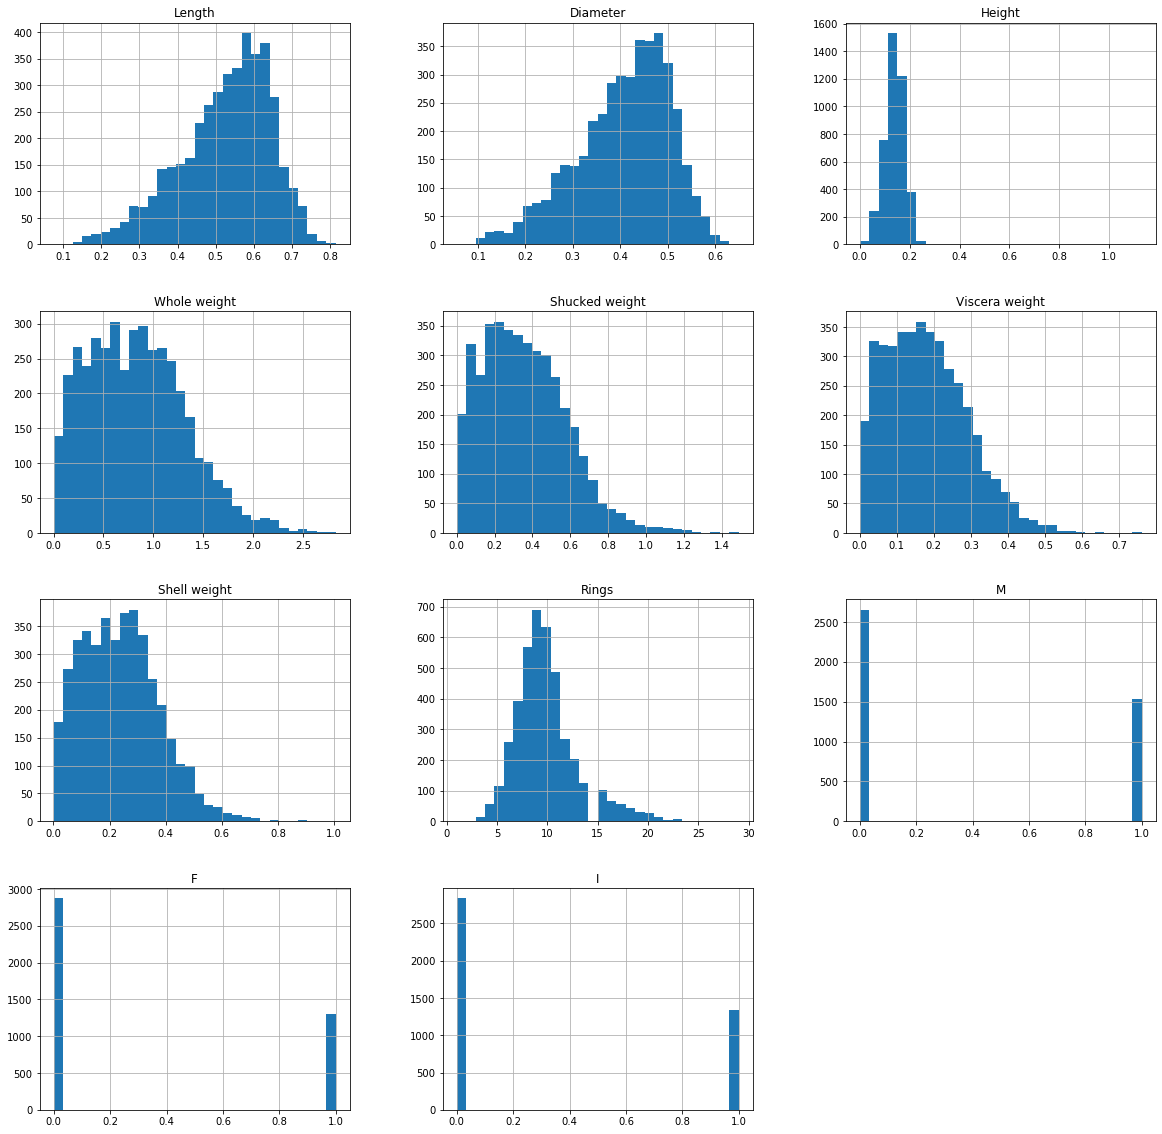

In [23]:
'''Histogram : to see the numeric data distribution'''
df.hist(figsize=(20,20), grid = True, bins = 30)

In [24]:
#the data is skewed
skew_list = skew(df[nf],nan_policy='omit') #sending all numericalfeatures and omitting nan values
skew_list_df = pd.concat([pd.DataFrame(nf,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis = 1)

In [25]:
skew_list_df.sort_values(by='Skewness', ascending = False)

,Features,Skewness
2,Height,3.127694
7,Rings,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


In [26]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
M                 0.557390
F                 0.807302
I                 0.765708
dtype: float64

In [27]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,M,F,I
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.236543,0.309666,-0.551465
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.240376,0.318626,-0.564315
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.215459,0.298421,-0.518552
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.252038,0.299741,-0.557592
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.251793,0.263991,-0.521842
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.242194,0.308444,-0.556081
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.235391,0.306319,-0.546953
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,0.181831,0.250279,-0.436063
M,0.236543,0.240376,0.215459,0.252038,0.251793,0.242194,0.235391,0.181831,1.000000,-0.512528,-0.522541
F,0.309666,0.318626,0.298421,0.299741,0.263991,0.308444,0.306319,0.250279,-0.512528,1.000000,-0.464298


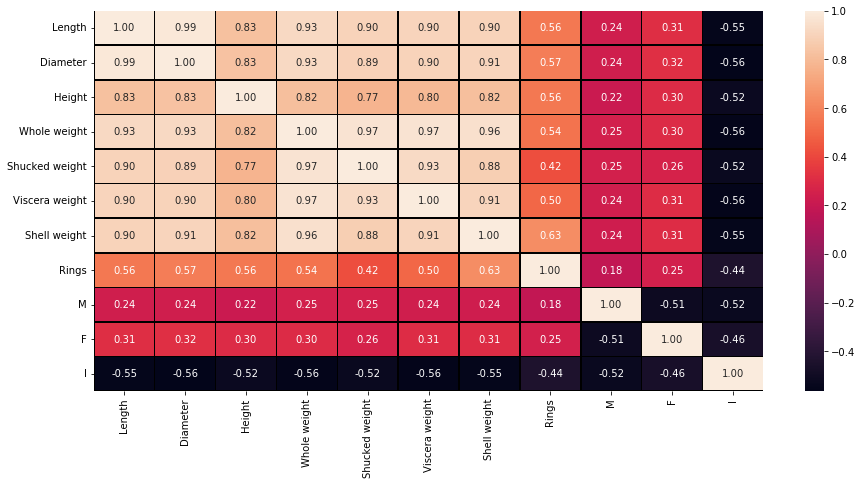

In [28]:
#Correlation using heatmap:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

CORRELATION COMMENTS: almost all data is positively correlated with target
max corr: shell weight
min corr: M,F,I

For categorical feature "Sex", we already did "Hot Encoder2 transformation. For the numerical data we will normalize the data as we want to bring the data in a particular range. For that, we will study skewness, outliers and process Standard Scaling in order to normalize the data.
Rings column is our target column and others are the features to be studied.

We already checked we have skewness in our data.  And we will check outliers in our data remove them if we can.

In [29]:
#Checking the outliers and removing them:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape


(4177, 11)

In [30]:
threhold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [31]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(4177, 11)
(4027, 11)


In [32]:
#Percentage of data loss:
loss_perc=(4177-4027)/4177*100
loss_perc #since the loss < 10%, so we can proceed with removing the outliers.

3.5910940866650707

In [33]:
#Now let's split the data by features (X, all except Rings) and target outcome (Y, Rings)

X=df_new.drop(['Rings'],axis=1)
Y=df_new['Rings']

In [34]:
X

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,1.0,0.0,0.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1.0,0.0,0.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0.0,1.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1.0,0.0,0.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0.0,1.0,0.0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1.0,0.0,0.0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1.0,0.0,0.0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0.0,1.0,0.0


In [35]:
Y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4027, dtype: int64

In [36]:
#Transforming the data to remove the skewness:
from sklearn.preprocessing import power_transform
x=power_transform(X,method='yeo-johnson')

In [37]:
x

array([[-0.68445079, -0.54337947, -1.15893308, ...,  1.32883283,
        -0.67052519, -0.6990884 ],
       [-1.4117394 , -1.40113174, -1.28040611, ...,  1.32883283,
        -0.67052519, -0.6990884 ],
       [-0.0462191 ,  0.03716259, -0.12830502, ..., -0.7525401 ,
         1.49136828, -0.6990884 ],
       ...,
       [ 0.65112915,  0.70592133,  1.94363286, ...,  1.32883283,
        -0.67052519, -0.6990884 ],
       [ 0.92606411,  0.8377131 ,  0.28606972, ..., -0.7525401 ,
         1.49136828, -0.6990884 ],
       [ 1.9719402 ,  1.85550496,  1.62558351, ...,  1.32883283,
        -0.67052519, -0.6990884 ]])

In [38]:
#now we will standardrize the data 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.68445079, -0.54337947, -1.15893308, ...,  1.32883283,
        -0.67052519, -0.6990884 ],
       [-1.4117394 , -1.40113174, -1.28040611, ...,  1.32883283,
        -0.67052519, -0.6990884 ],
       [-0.0462191 ,  0.03716259, -0.12830502, ..., -0.7525401 ,
         1.49136828, -0.6990884 ],
       ...,
       [ 0.65112915,  0.70592133,  1.94363286, ...,  1.32883283,
        -0.67052519, -0.6990884 ],
       [ 0.92606411,  0.8377131 ,  0.28606972, ..., -0.7525401 ,
         1.49136828, -0.6990884 ],
       [ 1.9719402 ,  1.85550496,  1.62558351, ...,  1.32883283,
        -0.67052519, -0.6990884 ]])

In [39]:
#split data in training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=0)

In [40]:
#Shape of training and testing data¶

print("train_df_x:")
print(X_train.shape)

print("train_df_y:")
print(Y_train.shape)

print("test_df_x:")
print(X_test.shape)

print("test_df_y:")
print(Y_test.shape)

train_df_x:
(2818, 10)
train_df_y:
(2818,)
test_df_x:
(1209, 10)
test_df_y:
(1209,)


In [41]:
!pip install imblearn  

In [42]:
!pip install imbalanced-learn

In [43]:
#Since out target column is imbalanced due to not being in equal proportion for each unique value of target "Ring"
from imblearn.over_sampling import SMOTE
x_train_over, y_train_over=SMOTE(k_neighbors=3).fit_resample(x,Y)

Since the outcome is continuos, we will apply the following ML Regression algorithm.

Training different models
Now we will train various models for this regression problem. We will compare with the help of Regression metrics namely MAE (mean absolute error),MSE (mean squared error) and R² (R squared) for comparison of different models.



In [44]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
for i in range(0,10):
    X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=i)
    lr.fit(X_train,Y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state {i}, the training accuracy is: - {r2_score(Y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is: - {r2_score(Y_test,pred_test)}")
    print("\n")
    

At random state 0, the training accuracy is: - 0.5364835879598746
At random state 0, the testing accuracy is: - 0.48665285393525637


At random state 1, the training accuracy is: - 0.5325450213072968
At random state 1, the testing accuracy is: - 0.4915731281482373


At random state 2, the training accuracy is: - 0.5229389757517986
At random state 2, the testing accuracy is: - 0.5204934795767284


At random state 3, the training accuracy is: - 0.5227817789848359
At random state 3, the testing accuracy is: - 0.5178889846132405


At random state 4, the training accuracy is: - 0.5206742701772774
At random state 4, the testing accuracy is: - 0.5244120752591277


At random state 5, the training accuracy is: - 0.531572170587318
At random state 5, the testing accuracy is: - 0.49887106978091267


At random state 6, the training accuracy is: - 0.5266205477291173
At random state 6, the testing accuracy is: - 0.5110319823133938


At random state 7, the training accuracy is: - 0.5354352373948321
At

With range till 10, random state has controled training an testing accuracy, which is good as we can see we do not have variance in testing or training. Both are closest to each other. Since the random state 2 or 4 are the closest and best for accuracy, we can select on of these. Let's take randdom seed 2 for our training and testing.

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=2)
lr.fit(X_train,Y_train)

LinearRegression()

In [46]:
pred_test=lr.predict(X_test)
print(r2_score(Y_test,pred_test))

0.5204934795767284


In [47]:
#Cross validation of the model:
Train_accuracy=r2_score(Y_train,pred_train)
Test_accuracy=r2_score(Y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,20):
    cv_score=cross_val_score(lr,x,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the CV score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the CV score is 0.5180288758040956 and accuracy score for training is -0.48366523590841504 and accuracy for the testing is 0.5204934795767284


At cross fold 3 the CV score is 0.5092129550010874 and accuracy score for training is -0.48366523590841504 and accuracy for the testing is 0.5204934795767284


At cross fold 4 the CV score is 0.4489747552298188 and accuracy score for training is -0.48366523590841504 and accuracy for the testing is 0.5204934795767284


At cross fold 5 the CV score is 0.44183184975691814 and accuracy score for training is -0.48366523590841504 and accuracy for the testing is 0.5204934795767284


At cross fold 6 the CV score is 0.44862518104033083 and accuracy score for training is -0.48366523590841504 and accuracy for the testing is 0.5204934795767284


At cross fold 7 the CV score is 0.45875786312799055 and accuracy score for training is -0.48366523590841504 and accuracy for the testing is 0.5204934795767284


At cross fold 8 the CV score is 0.426

In [48]:
#Winthin range of cross fold of 2 and 20, we do not see important difference in the trainiing and testing accuracy.



AttributeError: 'Text' object has no property 'fonsize'

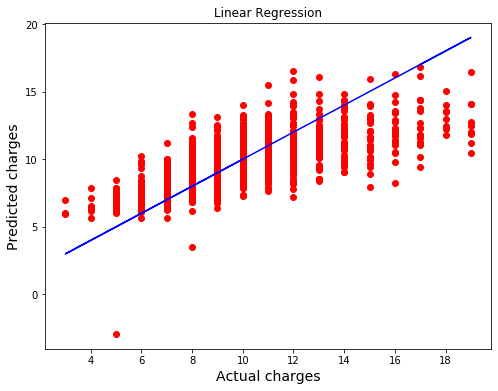

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=Y_test,y=pred_test,color='r')
plt.plot(Y_test,Y_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges', fontsize=14)
plt.title('Linear Regression', fonsize=18)
plt.show()

Not best line is covering most of the datapoints which shows a bad fit of our model

In [50]:
#Regularization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')

In [51]:
#we will cross validate with Lasso techniquue
from sklearn.linear_model import Lasso
parameters={ 'alpha':[.0001,.001,.01,.1,1,10], 'random_state': list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [52]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(X_test)
lss=r2_score(Y_test,pred_ls)
lss

0.5202517770802726

In [53]:
cv_score=cross_val_score(ls,x,Y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.441430420006817

In [54]:
#Ensemble Technique:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)


{'criterion': 'mse', 'max_features': 'log2'}


In [55]:
rf=RandomForestRegressor(criterion="mse",max_features="log2")
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
pred_decision=rf.predict(X_test)

rfs=r2_score(Y_test,pred_decision)
print('R2 score:',rfs*100)

rfscore=cross_val_score(rf,x,Y, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:', rfc*100)

pred_test=rf.predict(X_test)
print(r2_score(Y_test,pred_test))

R2 score: 54.31728632622752
Cross Val Score: 47.031732253113226
0.5431728632622752


We are getting model acurracy and cross validation both as around 50% which means the model is performing not so well. Since most of the accurcy are around 50%. We can use RF algorithm as the best one and save it.

In [56]:
import pickle
filename='Abalone.pkl'
pickle.dump(rf,open(filename,'wb'))

In [57]:
#Conslusion
import pickle
loaded_model=pickle.load(open('Abalone.pkl','rb'))
result=loaded_model.score(X_test,Y_test)
print(result)


0.5431728632622752


In [58]:
Conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]],index=["Predicted","Original"])

In [59]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208
Predicted,10.51,9.51,13.25,8.37,8.65,12.03,9.77,11.27,8.39,11.35,...,10.65,7.87,8.61,9.11,6.21,11.08,9.03,13.07,11.46,12.98
Original,10.51,9.51,13.25,8.37,8.65,12.03,9.77,11.27,8.39,11.35,...,10.65,7.87,8.61,9.11,6.21,11.08,9.03,13.07,11.46,12.98


In [60]:
#Trying more models such as lOGISTIC Regression andd SVM:

In [61]:
'''Creating Object of LogisticRegression'''
logreg = LogisticRegression()
'''Learning from Training Set'''
logreg.fit(X_train, Y_train)
'''Predicting for Training Set'''
Y_pred = logreg.predict(X_test)
'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred)
result_acc #0.2712 worse than our saved model rf that has 0.5478506272985564


0.27129859387923905

In [62]:
#Let's see if we find sometginh else with better results:

In [63]:
def scatter_y(true_y, predicted_y):
    """Scatter-plot the predicted vs true number of rings
    
    Plots:
       * predicted vs true number of rings
       * perfect agreement line
       * +2/-2 number dotted lines

    Returns the root mean square of the error
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(true_y, predicted_y, '.k')
    
    ax.plot([0, 30], [0, 30], '--k')
    ax.plot([0, 30], [2, 32], ':k')
    ax.plot([2, 32], [0, 30], ':k')
    
    rms = (true_y - predicted_y).std()
    
    ax.text(25, 3,
            "Root Mean Square Error = %.2g" % rms,
            ha='right', va='bottom')

    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)
    
    ax.set_xlabel('True number of rings')
    ax.set_ylabel('Predicted number of rings')
    
    return rms

Root Mean Square error decreases from 2.2 to 2.2.


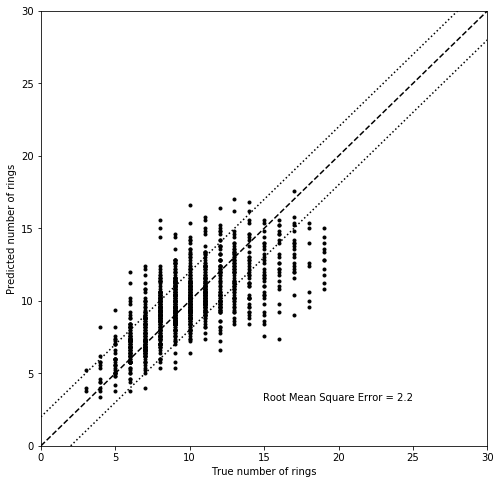

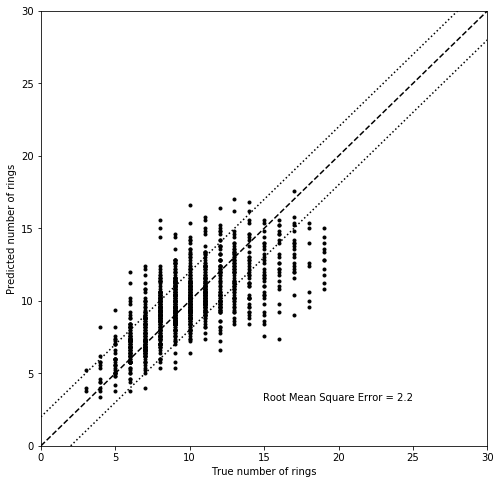

In [64]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=5)
model.fit(X_train, Y_train)
predicted_test_y = model.predict(X_test)
rms_random_forest = scatter_y(Y_test, predicted_test_y)
rms_decision_tree = scatter_y(Y_test, predicted_test_y)
print("Root Mean Square error decreases from %.2g to %.2g." % (rms_decision_tree, rms_random_forest))


We have no decrease in Root Mean Square error.
To optimize the model, we need to optimize through the Random Forest parameters like max_depth or max_features.
Having our parameters,RandomizedSearchCV uses cross validation in order to look and validate the best parameters.



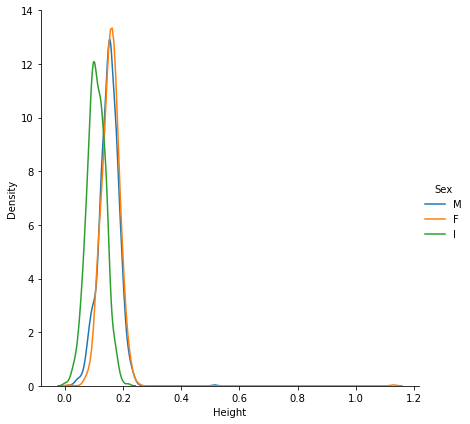

In [65]:
sns.FacetGrid(abalone, hue="Sex", size=6) \
   .map(sns.kdeplot, "Height") \
   .add_legend()
plt.show()



1. Logistic Regression¶

In [68]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
#from statsmodels.formula.api import logit, probit, poisson, ols

train_X=X_train
train_y=Y_train
test_X=X_test
test_y=Y_test
#logit = sm.Logit(train_y, train_X)
#affair_mod = logit.fit()
#print(affair_mod.summary())
#model = LogisticRegression()

#logistic regression
log_reg = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
log_reg.fit(train_X, train_y)
print ("Intercept is ",log_reg.intercept_)
#print("Coefficient is ",log_reg.coef_)
y_pred=log_reg.predict(test_X) 

#calculate ROC curve
#preds = log_reg.predict_proba(test_X)
#calculate_roc_curve(test_y, preds,3)
from sklearn.metrics import confusion_matrix
#calculate Confusion Matrix
print("Confusion Matrix")
confusion_matrix(test_y, y_pred)
    
print("Accuracy of Logistic Regression is:")
print(accuracy_score(test_y, y_pred)*100)


#Mean Absolute Error 
mae=mean_absolute_error(test_y,y_pred);
print("MAE:"+str(mae))

#RMSE 
rmse = math.sqrt(mean_squared_error(test_y,y_pred))
print("RMSE:"+str(rmse))

#Median Absolute error
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error, median_absolute_error

Medae=median_absolute_error(test_y,y_pred)
print("Median Absolute Error:"+str(Medae)) 


print("Classification report for Test data %s:\n%s\n\n"
     % (log_reg, metrics.classification_report(test_y, y_pred)))

Intercept is  [-13.53191445 -14.05959706  -5.6468151    0.57753353   2.74980473
   4.12255069   4.50365342   4.3073288    3.78705536   3.10602177
   2.73158181   2.1928489    1.89277907   0.72419187   1.05220683
   1.11799509   0.37277472]
Confusion Matrix
Accuracy of Logistic Regression is:
26.96443341604632
MAE:1.5153019023986767
RMSE:2.2347729394693063
Median Absolute Error:1.0
Classification report for Test data LogisticRegression(multi_class='multinomial', solver='newton-cg'):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.25      0.17      0.20        12
           5       0.38      0.42      0.40        31
           6       0.45      0.33      0.38        90
           7       0.33      0.41      0.36       115
           8       0.28      0.29      0.29       164
           9       0.32      0.45      0.38       208
          10       0.17      0.28      0.21       174
          11       0.25   

In [69]:
#No improvement_ worst than the model saved.

In [70]:
def confusion_matrix_data(conf_matrix):
    fix, ax = plt.subplots(figsize=(16, 12))
    plt.suptitle('Confusion Matrix  on Data Set')
    for ii, values in conf_matrix.items():
        matrix = values['matrix']
        title = values['title']
        plt.subplot(2, 2, ii) # starts from 1
        plt.title(title);
        sns.heatmap(matrix, annot=True,  fmt='');

In [72]:
#Same here_ worst than the model saved.

In [77]:
#Trying again to play with new way of training in order to improve the results. Let's try again:

In [82]:
#Load data
abalone=pd.read_csv("abalone.csv")
abl=abalone.copy()

In [83]:
#one hot encoding
#we will separate target from others features
abl_all=abl.drop(columns='Rings')
target=abl['Rings']

In [84]:
abl_all=pd.get_dummies(abl_all)
abl_all.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [85]:
abl_all.shape

(4177, 10)

In [86]:
target.value_counts()
#Classes of target are not balanced

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [87]:
#Scaling
abl_unscaled=abl_all.values
abl_minimax=preprocessing.MinMaxScaler().fit_transform(abl_unscaled)

#Feature Selection
We will use min-max scaled data  to see the importance of each feature. For that, we will use FScore, Mutual Information, and RandomForest Importance (RFI) and check the feature importance.
Once the top features are selected, we will fed it to the 1-NN algorithm using the scaled data. 
Then, we will check t-test on 3 results and features will be selected by the method with the best accuracy.

Finally, we will do a performance check with full set of features.

In [88]:
#Performance with Full Set of Features
KNN=KNeighborsRegressor(n_neighbors=1)
cv_method=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=9)
scoring_metric='accuracy'
cv_results_full=cross_val_score(estimator=KNN, X=abl_minimax, y=target, cv=cv_method,scoring=scoring_metric)
cv_results_full

array([0.16746411, 0.22009569, 0.21077844, 0.2011976 , 0.2011976 ,
       0.20933014, 0.21650718, 0.18922156, 0.17844311, 0.19041916,
       0.17822967, 0.22607656, 0.20958084, 0.19520958, 0.19640719])

In [89]:
cv_results_full.mean().round(4) #worst than model saved

0.1993

In [90]:
num_features=10 #will take all 10 features
fs_fit_fscore=fs.SelectKBest(fs.f_classif,k=num_features)
fs_fit_fscore.fit_transform(abl_minimax,target)
fs_indices_fscore=np.argsort(fs_fit_fscore.scores_)[::-1][0:num_features]
fs_indices_fscore

array([1, 0, 6, 2, 3, 5, 4, 8, 7, 9])

In [91]:
best_features_fscore=abl_all.columns[fs_indices_fscore].values
best_features_fscore

array(['Diameter', 'Length', 'Shell weight', 'Height', 'Whole weight',
       'Viscera weight', 'Shucked weight', 'Sex_I', 'Sex_F', 'Sex_M'],
      dtype=object)

In [92]:
feat_import_fscore=fs_fit_fscore.scores_[fs_indices_fscore]

In [93]:
def plot_imp(best_features,scores,method_name,color):
    df=pd.DataFrame({'features': best_features, 'importances':scores})
    chart=alt.Chart(df,width=500,title=method_name+' Feature Importances').mark_bar(opacity=0.75,color=color).encode(
        alt.X('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=45)),
        alt.Y('importances', title='Importance')
    )
    
    return chart

In [94]:
cv_results_fscore=cross_val_score(estimator=clf, X=abl_minimax[:,fs_indices_fscore[:8]], y=target, cv=cv_method,scoring=scoring_metric)
cv_results_fscore.mean().round(4)

0.2359

In [96]:
#Feature Selection Using Mutual Information
fs_fit_mut=fs.SelectKBest(fs.mutual_info_classif, k=num_features)
fs_fit_mut.fit_transform(abl_minimax,target)
fs_indices_mut_info=np.argsort(fs_fit_mut.scores_)[::-1][0:num_features]
best_feat_mut=abl_all.columns[fs_indices_mut_info].values
feat_imp_mut=fs_fit_mut.scores_[fs_indices_mut_info]
cv_results_mut=cross_val_score(estimator=clf, X=abl_minimax[:,fs_indices_mut_info[:8]], y=target, cv=cv_method,scoring=scoring_metric)
cv_results_fscore.mean().round(4)

0.2359

In [ ]:
#Festure Selection Using Random Forest Importance
model_rfi=RandomForestRegressor(n_estimators=100)
model_rfi.fit(abl_minimax,target)
fs_indices_rfi=np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]
bst_features_rfi=abl_all.columns[fs_indices_rfi].values
feat_imp_rfi=model_rfi.feature_importances_[fs_indices_rfi]
cv_results_rfi=cross_val_score(estimator=clf, X=abl_minimax[:,fs_indices_rfi[:5]], y=target, cv=cv_method,scoring=scoring_metric)
cv_results_fscore.mean().round(4)

In [98]:
print(stats.ttest_rel(cv_results_rfi,cv_results_fscore))
print(stats.ttest_rel(cv_results_rfi, cv_results_mut))
print(stats.ttest_rel(cv_results_mut,cv_results_fscore ))

Ttest_relResult(statistic=-0.8657403081522772, pvalue=0.4012255468639503)
Ttest_relResult(statistic=-0.8657403081522772, pvalue=0.4012255468639503)
Ttest_relResult(statistic=nan, pvalue=nan)


In [ ]:
#nno significantly important_ #we will keep our saved model

In [99]:
print(stats.ttest_rel(cv_results_rfi,cv_results_full))

Ttest_relResult(statistic=6.997485000825081, pvalue=6.272874421239062e-06)


In [100]:
abl_all.columns[fs_indices_rfi[:5]]
abl_minmax_df=pd.DataFrame(data=abl_minimax,columns=abl_all.columns)
abl_rfi=abl_minmax_df[abl_all.columns[fs_indices_rfi[:5]]]
abl_rfi=abl_rfi.values

In [108]:
cv_method=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
params_KNN={'n_neighbors': [2,4,8,16,32,64], #largest k should be less than sqrt(n)=s qrt(4177) ewhich is 64.
            'p': [1,2]}
gs_KNN=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_KNN,cv=cv_method,verbose=1,scoring='accuracy', return_train_score=True)
gs_KNN.fit(abl_rfi,target)

Fitting 30 folds for each of 12 candidates, totalling 360 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 4, 8, 16, 32, 64], 'p': [1, 2]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [109]:
gs_KNN.best_params_

{'n_neighbors': 2, 'p': 1}

In [110]:
gs_KNN.best_score_

nan

In [104]:
results_KNN=pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score']=gs_KNN.cv_results_['mean_test_score']
results_KNN['metrics']=results_KNN['p'].replace([1,2,3],['Manhattan','Euclidean','Minkowski'])
results_KNN

,n_neighbors,p,test_score,metrics
0,2,1,0.219699,Manhattan
1,2,2,0.219617,Euclidean
2,4,1,0.219697,Manhattan
3,4,2,0.220250,Euclidean
4,8,1,0.239889,Manhattan
5,8,2,0.241088,Euclidean
6,16,1,0.251063,Manhattan
7,16,2,0.251218,Euclidean
8,32,1,0.255526,Manhattan
9,32,2,0.257763,Euclidean


In [ ]:
#no improvement

In [113]:
#tryig with DTR
df_reg=DecisionTreeRegressor(random_state=2)
params_DT={'criterion':['mse', 'friedman_mse', 'mae', 'poisson'], 
           'max_depth': [1,2,3,4,5,6,7,8],
           'min_samples_split': [2,3]}
cv_method=RepeatedStratifiedKFold(n_splits=5,n_repeats=3, random_state=1)
gs_DT=GridSearchCV (estimator=df_reg,param_grid=params_DT, cv=cv_method, verbose=1,scoring='accuracy')
gs_DT.fit(abl_rfi,target)

Fitting 15 folds for each of 64 candidates, totalling 960 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=DecisionTreeRegressor(random_state=2),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3]},
             scoring='accuracy', verbose=1)

In [114]:
gs_DT.best_params_

{'criterion': 'mae', 'max_depth': 3, 'min_samples_split': 2}

In [115]:
gs_DT.best_score_ #no improvement compared to the saved model

0.24219961989895805

In [119]:
#trying with RFR
df_reg=RandomForestRegressor(random_state=2)
params_RF={'criterion':['mse', 'friedman_mse', 'mae', 'poisson'], 
           'max_depth': [8],
           'min_samples_split': [2,3]}
cv_method=RepeatedStratifiedKFold(n_splits=5,n_repeats=3, random_state=1)
gs_RF=GridSearchCV (estimator=df_reg,param_grid=params_RF, cv=cv_method, verbose=1,scoring='accuracy')
gs_RF.fit(abl_rfi,target)

Fitting 15 folds for each of 8 candidates, totalling 120 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=RandomForestRegressor(random_state=2),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': [8], 'min_samples_split': [2, 3]},
             scoring='accuracy', verbose=1)

In [120]:
gs_RF.best_params_

{'criterion': 'mse', 'max_depth': 8, 'min_samples_split': 2}

In [121]:
gs_RF.best_score_

nan

In [124]:
#tring with MLPR
from sklearn.neural_network import MLPRegressor
df_classifier=MLPRegressor(max_iter=1)

params_MLP={'hidden_layer_sizes':[5,10,20],
            'alpha': [0.0001, 0.001],
            'solver': ['sgd','adam'],
            'learning_rate':['constant','adaptive']}
cv_method=RepeatedStratifiedKFold(n_splits=5,n_repeats=3, random_state=1)
gs_MLP=GridSearchCV (estimator=df_classifier,param_grid=params_MLP, cv=cv_method, verbose=1,scoring='accuracy')
gs_MLP.fit(abl_rfi,target)

Fitting 15 folds for each of 24 candidates, totalling 360 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=MLPRegressor(max_iter=1),
             param_grid={'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [5, 10, 20],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             scoring='accuracy', verbose=1)

In [125]:
gs_MLP.best_params_

{'alpha': 0.0001,
 'hidden_layer_sizes': 5,
 'learning_rate': 'constant',
 'solver': 'sgd'}

In [126]:
gs_MLP.best_score_

nan

In [127]:
#tryin something more_if we have luck

In [128]:
kf=KFold(n_splits=5)
test=[]
prediction=[]
model=LinearRegression()
for train_index,test_index in kf.split(abl_rfi):
    X_train,X_test=abl_rfi[train_index],abl_rfi[test_index]
    y_train, y_test=target.values[train_index],target.values[test_index]
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    
    prediction += [pred[x] for x in range(len(pred))]
    test += [y_test[x] for x in range(len(y_test))]
    
error=mean_squared_error(test,prediction)
print(error)
print(error*0.5) #root_mean_square

5.495495726045763
2.7477478630228815


In [129]:
#T Poor performance as linears models can not predict that much good the integers target. So we will try Logistic Regresision.

In [131]:
test=[]
prediction=[]
model=LogisticRegression()
for train_index,test_index in kf.split(abl_rfi):
    X_train,X_test=abl_rfi[train_index],abl_rfi[test_index]
    y_train, y_test=target.values[train_index],target.values[test_index]
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    
    prediction += [pred[x] for x in range(len(pred))]
    test += [y_test[x] for x in range(len(y_test))]

error=mean_squared_error(test,prediction)
print(error)
print(error*0.5) #root_mean_square

8.449844385922912
4.224922192961456


In [ ]:
#more error than the saved model_so we will stop researching for more as i need to upload the analysis TODAYYYYY
#and the next step take more time and the kernel stops working every time

In [ ]:
#LogisticRegressionCV
model=LogisticRegressionCV()
cv_results_logic=cross_val_score(model,abl_rfi,target.values,cv=5)
cv_results_logic.mean().round(4)

In [ ]:
cv_method_ttest=StratifiedKFold(n_splits=10,random_state=1)
cv_results_KNN=cross_val_score(estimator=gs_KNN.best_estimator_, X=abl_rfi, y=target, cv=cv_method_ttest, n_jobs=2,scoring='accuracy')
cv_results_KNN.mean()

In [ ]:
cv_results_DT=cross_val_score(estimator=gs_DT.best_estimator_, X=abl_rfi, y=target, cv=cv_method_ttest, n_jobs=2,scoring='accuracy')
cv_results_DT.mean()

In [ ]:
cv_results_RF=cross_val_score(estimator=gs_RF.best_estimator_, X=abl_rfi, y=target, cv=cv_method_ttest, n_jobs=2,scoring='accuracy')
cv_results_RF.mean()

In [ ]:
cv_results_NB=cross_val_score(estimator=gs_NB.best_estimator_, X=abl_rfi, y=target, cv=cv_method_ttest, n_jobs=2,scoring='accuracy')
cv_results_NB.mean()

In [ ]:
cv_results_MLP=cross_val_score(estimator=gs_MLP.best_estimator_, X=abl_rfi, y=target, cv=cv_method_ttest, n_jobs=2,scoring='accuracy')
cv_results_MLP.mean()

In [ ]:
print(stats.ttest_rel(cv_results_RF,cv_results_KNN))
print(stats.ttest_rel(cv_results_RF,cv_results_DT))
print(stats.ttest_rel(cv_results_RF,cv_results_NB))
print(stats.ttest_rel(cv_results_RF,cv_results_MLP))


In [ ]:
pred_KNN=gs_KNN.predict(abl_rfi)
pred_DT=gs_DT.predict(abl_rfi)
pred_RF=gs_RF.predict(abl_rfi)
pred_NB=gs_NB.predict(abl_pwr_rfi)
pred_MLP=gs_MLP.predict(abl_rfi)

In [ ]:
print("/nClassification report for Random Forest")
print(metrics.classification_report(target,pred_RF))

#chk for all? #largetarget

In [ ]:
print("/nConfusion matrix for KNN ")
print(metrics.confusion_matrix(target,pred_RF))



RF has the best performance (eventhough no that significant).

model accuracy is vey low, hence low model performer. The reason is the we have imbalanced target. we did try oversampling the data so that we can get rid of this imbalance of target data.

proposed solution would be to use hyperparameters tecnique to get btter performance. but right now, i am not in the condition to continue to work on this project.

If needed, i can try again to obtain the best model once i am recovered from my Covid extrem heath issue.